In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('market.csv')
test=pd.read_csv('market_test.csv')

In [3]:
train.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRB24,CHUKWUDI017,DRB24_CHUKWUDI017,8.785,Low Fat,0.020694,Soft Drinks,382.91,2014,NaN,Cluster 2,Supermarket Type1,4633.97
1,FDR31,CHUKWUDI019,FDR31_CHUKWUDI019,NaN,Normal Fat,0.086078,Fruits and Vegetables,359.53,1992,Small,Cluster 1,Grocery Store,729.05
2,FDP16,CHUKWUDI017,FDP16_CHUKWUDI017,18.600,Low Fat,0.039517,Frozen Foods,609.20,2014,NaN,Cluster 2,Supermarket Type1,14740.81
3,FDY16,CHUKWUDI027,FDY16_CHUKWUDI027,NaN,Normal Fat,0.091780,Frozen Foods,456.32,1992,Medium,Cluster 3,Supermarket Type3,16137.33
4,FDY48,CHUKWUDI046,FDY48_CHUKWUDI046,14.000,Low Fat,0.023735,Baking Goods,258.08,2004,Small,Cluster 1,Supermarket Type1,4613.99


In [4]:
train.shape

(3742, 13)

# exploration of data,preprocessing and feature engineering

train dataset

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Product_Identifier              3742 non-null   object 
 1   Supermarket_Identifier          3742 non-null   object 
 2   Product_Supermarket_Identifier  3742 non-null   object 
 3   Product_Weight                  3141 non-null   float64
 4   Product_Fat_Content             3742 non-null   object 
 5   Product_Shelf_Visibility        3742 non-null   float64
 6   Product_Type                    3742 non-null   object 
 7   Product_Price                   3742 non-null   float64
 8   Supermarket_Opening_Year        3742 non-null   int64  
 9   Supermarket _Size               2616 non-null   object 
 10  Supermarket_Location_Type       3742 non-null   object 
 11  Supermarket_Type                3742 non-null   object 
 12  Product_Supermarket_Sales       37

In [6]:
train.describe()   #information of the data types

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,3141.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,12.870640,0.066613,391.815315,2004.778461,6103.735353
std,4.730432,0.052951,120.204222,8.276712,4456.169125
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.630000,0.026971,308.392500,1994.000000,2728.120000
50%,12.600000,0.053517,393.910000,2006.000000,5374.675000
75%,17.100000,0.095094,466.480000,2011.000000,8524.737500
max,21.350000,0.328391,667.220000,2016.000000,28612.760000


In [7]:
train.isnull().sum() #checking for missing values

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                     601
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket _Size                 1126
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
dtype: int64

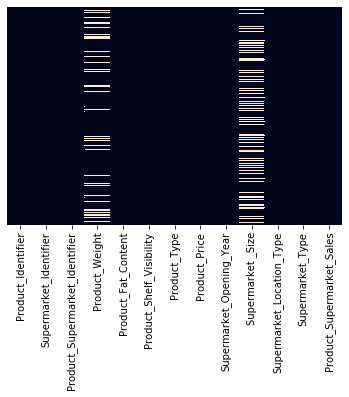

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False) 

In [9]:
train=train.fillna(method='bfill') #filling the missing values

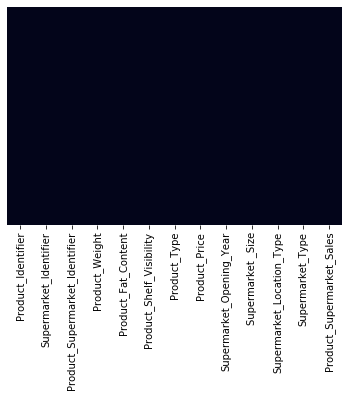

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [11]:
#dropping columns
train.drop(["Product_Identifier","Supermarket_Identifier","Product_Supermarket_Identifier"],axis=1,inplace=True)

In [12]:
train.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,8.785,Low Fat,0.020694,Soft Drinks,382.91,2014,Small,Cluster 2,Supermarket Type1,4633.97
1,18.600,Normal Fat,0.086078,Fruits and Vegetables,359.53,1992,Small,Cluster 1,Grocery Store,729.05
2,18.600,Low Fat,0.039517,Frozen Foods,609.20,2014,Medium,Cluster 2,Supermarket Type1,14740.81
3,14.000,Normal Fat,0.091780,Frozen Foods,456.32,1992,Medium,Cluster 3,Supermarket Type3,16137.33
4,14.000,Low Fat,0.023735,Baking Goods,258.08,2004,Small,Cluster 1,Supermarket Type1,4613.99


In [13]:
pd.crosstab(train['Supermarket _Size'], train['Product_Fat_Content']).head()

Product_Fat_Content,Low Fat,Normal Fat,Ultra Low fat
Supermarket _Size,,,
High,415,223,24
Medium,1008,616,52
Small,849,502,53


In [14]:
train['Product_Type'].value_counts()

Snack Foods              563
Fruits and Vegetables    556
Household                414
Frozen Foods             334
Canned                   294
Dairy                    263
Baking Goods             259
Health and Hygiene       222
Meat                     202
Soft Drinks              193
Breads                   115
Hard Drinks               97
Others                    82
Starchy Foods             62
Breakfast                 54
Seafood                   32
Name: Product_Type, dtype: int64

In [15]:
train["Health Content"]=["Healthy" 
                         if food=="Seafood"
                         or food=="Health and Hygiene" 
                         or food=="Dairy"
                         or food=="Fruits and Vegetables" 
                         else
                         "Unhealthy"
                         if food=="Starchy Foods"
                         or food=="Hard Drinks"
                         or food=="Soft Drinks"
                         or food=="Snack Foods"
                         else "Probably Healthy" \
for food in list(train["Product_Type"].values)]

train.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,Health Content
0,8.785,Low Fat,0.020694,Soft Drinks,382.91,2014,Small,Cluster 2,Supermarket Type1,4633.97,Unhealthy
1,18.600,Normal Fat,0.086078,Fruits and Vegetables,359.53,1992,Small,Cluster 1,Grocery Store,729.05,Healthy
2,18.600,Low Fat,0.039517,Frozen Foods,609.20,2014,Medium,Cluster 2,Supermarket Type1,14740.81,Probably Healthy
3,14.000,Normal Fat,0.091780,Frozen Foods,456.32,1992,Medium,Cluster 3,Supermarket Type3,16137.33,Probably Healthy
4,14.000,Low Fat,0.023735,Baking Goods,258.08,2004,Small,Cluster 1,Supermarket Type1,4613.99,Probably Healthy


In [16]:
train['Health Content'].value_counts()

Probably Healthy    1754
Healthy             1073
Unhealthy            915
Name: Health Content, dtype: int64

In [25]:
#trnasforming categorical features into numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Product_Fat_Content']=le.fit_transform(train['Product_Fat_Content'])
train['Product_Type']=le.fit_transform(train['Product_Type'])
train['Supermarket _Size']=le.fit_transform(train['Supermarket _Size'])
train['Supermarket_Location_Type']=le.fit_transform(train['Supermarket_Location_Type'])
train['Product_Fat_Content']=le.fit_transform(train['Product_Fat_Content'])
train['Supermarket_Type']=le.fit_transform(train['Supermarket_Type'])
train['Health Content']=le.fit_transform(train['Health Content'])

In [26]:
train.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,Health Content
0,8.785,0,0.020694,14,382.91,2014,2,1,1,4633.97,2
1,18.600,1,0.086078,6,359.53,1992,2,0,0,729.05,0
2,18.600,0,0.039517,5,609.20,2014,1,1,1,14740.81,1
3,14.000,1,0.091780,5,456.32,1992,1,2,3,16137.33,1
4,14.000,0,0.023735,0,258.08,2004,2,0,1,4613.99,1


In [27]:
train["Supermarket_Type"].value_counts()

1    2495
0     543
2     358
3     346
Name: Supermarket_Type, dtype: int64

In [28]:
train['Product_Fat_Content'].value_counts()

0    2272
1    1341
2     129
Name: Product_Fat_Content, dtype: int64

In [29]:
train['Supermarket_Location_Type'].value_counts()

2    1438
1    1210
0    1094
Name: Supermarket_Location_Type, dtype: int64

In [30]:
train['Supermarket _Size'].value_counts()

1    1676
2    1404
0     662
Name: Supermarket _Size, dtype: int64

In [31]:
train['Product_Fat_Content'].value_counts()

0    2272
1    1341
2     129
Name: Product_Fat_Content, dtype: int64

In [32]:
train['Health Content'].value_counts()

1    1754
0    1073
2     915
Name: Health Content, dtype: int64

In [33]:
test.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,FDC15,CHUKWUDI049,FDC15_CHUKWUDI049,18.100,Low Fat,0.178246,Dairy,395.32,2006,Medium,Cluster 1,Supermarket Type1
1,NCY06,CHUKWUDI018,NCY06_CHUKWUDI018,15.250,Low Fat,0.061434,Household,327.49,2016,Medium,Cluster 3,Supermarket Type2
2,DRB24,CHUKWUDI035,DRB24_CHUKWUDI035,8.785,Low Fat,0.020573,Soft Drinks,391.16,2011,Small,Cluster 2,Supermarket Type1
3,NCG54,CHUKWUDI018,NCG54_CHUKWUDI018,12.100,Low Fat,0.080131,Household,427.28,2016,Medium,Cluster 3,Supermarket Type2
4,NCA42,CHUKWUDI017,NCA42_CHUKWUDI017,6.965,Low Fat,0.028710,Household,395.40,2014,NaN,Cluster 2,Supermarket Type1


In [34]:
test.shape

(1248, 12)

# exploration of data,preprocessing and feature engineering

test data

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Product_Identifier              1248 non-null   object 
 1   Supermarket_Identifier          1248 non-null   object 
 2   Product_Supermarket_Identifier  1248 non-null   object 
 3   Product_Weight                  1047 non-null   float64
 4   Product_Fat_Content             1248 non-null   object 
 5   Product_Shelf_Visibility        1248 non-null   float64
 6   Product_Type                    1248 non-null   object 
 7   Product_Price                   1248 non-null   float64
 8   Supermarket_Opening_Year        1248 non-null   int64  
 9   Supermarket _Size               924 non-null    object 
 10  Supermarket_Location_Type       1248 non-null   object 
 11  Supermarket_Type                1248 non-null   object 
dtypes: float64(3), int64(1), object(8)

In [36]:
test.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year
count,1047.000000,1248.000000,1248.000000,1248.000000
mean,13.023434,0.067825,391.769255,2004.798878
std,4.621107,0.053390,116.914230,8.305732
min,4.555000,0.000000,84.220000,1992.000000
25%,8.985000,0.028697,307.700000,1994.000000
50%,12.850000,0.053678,392.990000,2006.000000
75%,17.000000,0.096293,459.280000,2011.000000
max,21.250000,0.325781,664.220000,2016.000000


In [37]:
test.isnull().sum()

Product_Identifier                  0
Supermarket_Identifier              0
Product_Supermarket_Identifier      0
Product_Weight                    201
Product_Fat_Content                 0
Product_Shelf_Visibility            0
Product_Type                        0
Product_Price                       0
Supermarket_Opening_Year            0
Supermarket _Size                 324
Supermarket_Location_Type           0
Supermarket_Type                    0
dtype: int64

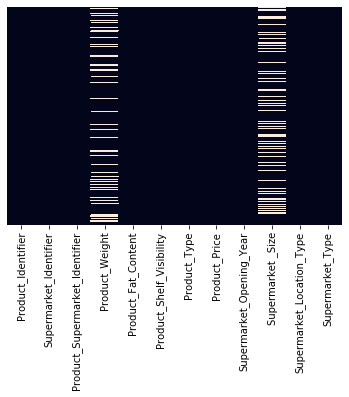

In [38]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False) 

In [39]:
test=test.fillna(method='bfill') 

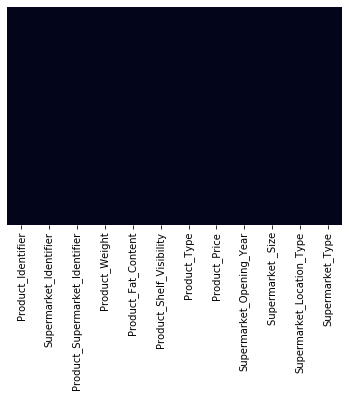

In [40]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

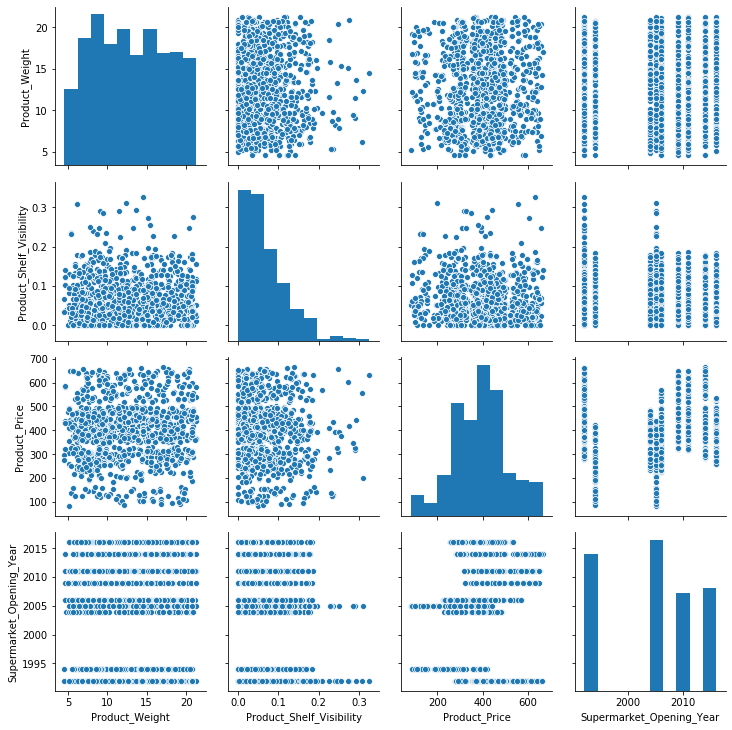

In [41]:
sns.pairplot(test)

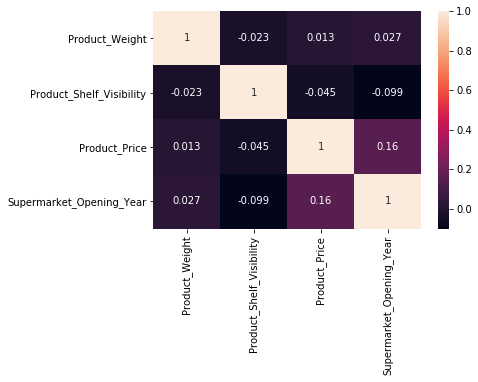

In [42]:
 #checking the correlation of the values
sns.heatmap(test.corr(),annot=True) #checking the correlation of the values

In [43]:
#dropping columns
test.drop(["Product_Identifier","Supermarket_Identifier","Product_Supermarket_Identifier"],axis=1,inplace=True)

In [44]:
test.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,18.100,Low Fat,0.178246,Dairy,395.32,2006,Medium,Cluster 1,Supermarket Type1
1,15.250,Low Fat,0.061434,Household,327.49,2016,Medium,Cluster 3,Supermarket Type2
2,8.785,Low Fat,0.020573,Soft Drinks,391.16,2011,Small,Cluster 2,Supermarket Type1
3,12.100,Low Fat,0.080131,Household,427.28,2016,Medium,Cluster 3,Supermarket Type2
4,6.965,Low Fat,0.028710,Household,395.40,2014,High,Cluster 2,Supermarket Type1


In [45]:
pd.crosstab(test['Supermarket _Size'], test['Product_Fat_Content']).head()
test['Product_Type'].value_counts()

Snack Foods              195
Fruits and Vegetables    191
Household                153
Frozen Foods             123
Dairy                     87
Baking Goods              85
Health and Hygiene        85
Canned                    82
Soft Drinks               68
Meat                      62
Hard Drinks               37
Breads                    22
Starchy Foods             19
Others                    18
Breakfast                 12
Seafood                    9
Name: Product_Type, dtype: int64

In [46]:
test["Health Content"]=["Healthy" 
                         if food=="Seafood"
                         or food=="Health and Hygiene" 
                         or food=="Dairy"
                         or food=="Fruits and Vegetables" 
                         else
                         "Unhealthy"
                         if food=="Starchy Foods"
                         or food=="Hard Drinks"
                         or food=="Soft Drinks"
                         or food=="Snack Foods"
                         else "Probably Healthy" \
for food in list(test["Product_Type"].values)]

In [47]:
test.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Health Content
0,18.100,Low Fat,0.178246,Dairy,395.32,2006,Medium,Cluster 1,Supermarket Type1,Healthy
1,15.250,Low Fat,0.061434,Household,327.49,2016,Medium,Cluster 3,Supermarket Type2,Probably Healthy
2,8.785,Low Fat,0.020573,Soft Drinks,391.16,2011,Small,Cluster 2,Supermarket Type1,Unhealthy
3,12.100,Low Fat,0.080131,Household,427.28,2016,Medium,Cluster 3,Supermarket Type2,Probably Healthy
4,6.965,Low Fat,0.028710,Household,395.40,2014,High,Cluster 2,Supermarket Type1,Probably Healthy


In [48]:
test['Health Content'].value_counts()

Probably Healthy    557
Healthy             372
Unhealthy           319
Name: Health Content, dtype: int64

In [49]:
test["Supermarket_Type"].value_counts()

Supermarket Type1    809
Grocery Store        181
Supermarket Type2    142
Supermarket Type3    116
Name: Supermarket_Type, dtype: int64

In [50]:
test['Product_Fat_Content'].value_counts()

Low Fat          767
Normal Fat       432
Ultra Low fat     49
Name: Product_Fat_Content, dtype: int64

In [51]:
test['Supermarket_Location_Type'].value_counts()

Cluster 3    502
Cluster 1    375
Cluster 2    371
Name: Supermarket_Location_Type, dtype: int64

In [52]:
test['Supermarket _Size'].value_counts()

Medium    574
Small     461
High      213
Name: Supermarket _Size, dtype: int64

In [53]:
test["Supermarket_Type"].value_counts()

Supermarket Type1    809
Grocery Store        181
Supermarket Type2    142
Supermarket Type3    116
Name: Supermarket_Type, dtype: int64

In [54]:
test['Health Content'].value_counts()

Probably Healthy    557
Healthy             372
Unhealthy           319
Name: Health Content, dtype: int64

# Data visualization

Text(0.5, 1.0, 'Health Content Frequency')

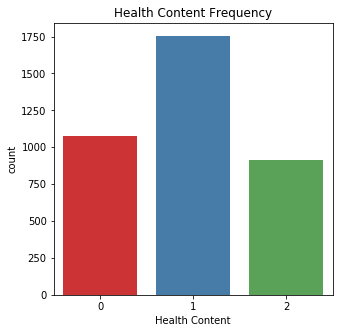

In [55]:
fig =plt.figure(figsize=(5,5))
sns.countplot(train['Health Content'],palette='Set1')
plt.title('Health Content Frequency')

Text(0.5, 1.0, 'Supermarket Type Frequency')

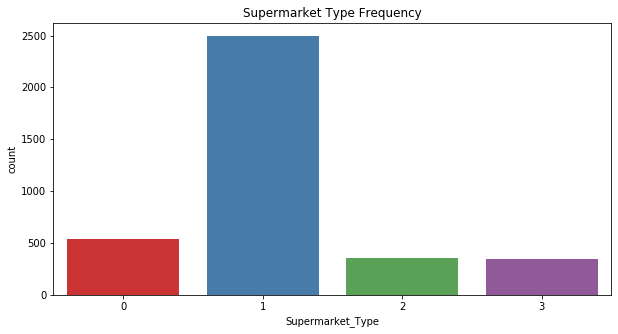

In [56]:
fig =plt.figure(figsize=(10,5))
sns.countplot(train["Supermarket_Type"],palette='Set1')
plt.title('Supermarket Type Frequency')

Text(0.5, 1.0, 'Supermarket size Frequency')

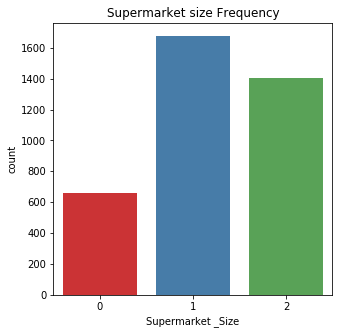

In [57]:
fig =plt.figure(figsize=(5,5))
sns.countplot(train["Supermarket _Size"],palette='Set1')
plt.title('Supermarket size Frequency')

Text(0.5, 1.0, 'Supermarket Location Type frequency')

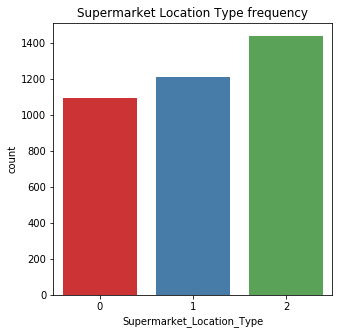

In [58]:
fig =plt.figure(figsize=(5,5))
sns.countplot(train["Supermarket_Location_Type"],palette='Set1')
plt.title('Supermarket Location Type frequency')

Text(0.5, 1.0, 'supermarket type Frequency')

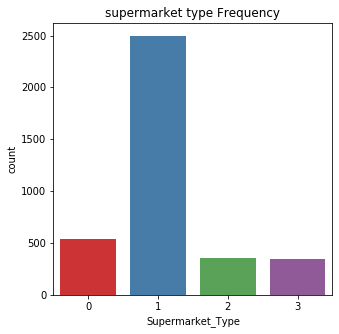

In [59]:
fig =plt.figure(figsize=(5,5))
sns.countplot(train["Supermarket_Type"],palette='Set1')
plt.title('supermarket type Frequency')

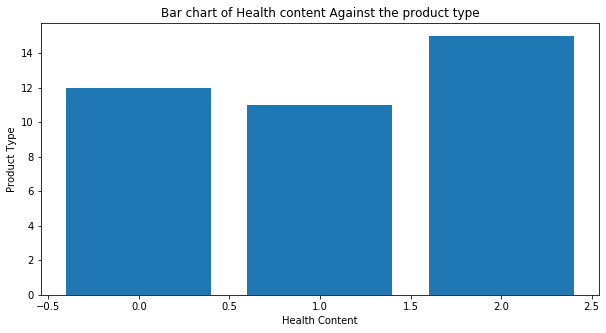

In [60]:
fig = plt.figure(figsize=(10,5))
plt.bar(train["Health Content"],train["Product_Type"],)
plt.xlabel("Health Content")
plt.ylabel("Product Type")
plt.title("Bar chart of Health content Against the product type")
plt.show()

In [62]:
#transforming the categorical featuresm intomnumerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test['Product_Fat_Content']=le.fit_transform(test['Product_Fat_Content'])
test['Product_Type']=le.fit_transform(test['Product_Type'])
test['Supermarket _Size']=le.fit_transform(test['Supermarket _Size'])
test['Supermarket_Location_Type']=le.fit_transform(test['Supermarket_Location_Type'])
test['Product_Fat_Content']=le.fit_transform(test['Product_Fat_Content'])
test['Supermarket_Type']=le.fit_transform(test['Supermarket_Type'])
test['Health Content']=le.fit_transform(test['Health Content'])

# Model building

In [63]:
x=train.drop("Product_Supermarket_Sales",axis='columns')

In [64]:
y=train.Product_Supermarket_Sales

In [65]:
x.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Health Content
0,8.785,0,0.020694,14,382.91,2014,2,1,1,2
1,18.600,1,0.086078,6,359.53,1992,2,0,0,0
2,18.600,0,0.039517,5,609.20,2014,1,1,1,1
3,14.000,1,0.091780,5,456.32,1992,1,2,3,1
4,14.000,0,0.023735,0,258.08,2004,2,0,1,1


In [66]:
y.head()

0     4633.97
1      729.05
2    14740.81
3    16137.33
4     4613.99
Name: Product_Supermarket_Sales, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Algorithm/ Model 1:Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [74]:
predictions=lr.predict(test)

# Algorithm/ Model 2: XGBOOST

In [75]:
import xgboost as xgb
xgbmodel=xgb.XGBRegressor(base_score=0.50, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgbmodel.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
predictions=xgbmodel.predict(test)

# model deployment

In [ ]:
import pickle
pickle_out=open("prediction.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()